In [1]:
import base64
import collections
import datetime
import itertools
import json
import os
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
#import PIL
import pylab
import scipy
#import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import xgboost as xgb

np.random.seed(1337)

%matplotlib inline

#sns.set(font_scale=1.0)
mpl.rcParams['figure.figsize'] = 10, 6
#sns.set_style('whitegrid')
#sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Language Processing and Python

## Computing with Language: Texts and Words

### Getting Started with NLTK

In [3]:
text1

<Text: Moby Dick by Herman Melville 1851>

### Searching Text

In [4]:
text1.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [5]:
text1.similar('monstrous')

imperial subtly impalpable pitiable curious abundant perilous
trustworthy untoward singular lamentable few determined maddens
horrible tyrannical lazy mystifying christian exasperate


In [6]:
text1.common_contexts(['monstrous', 'imperial'])

most_and


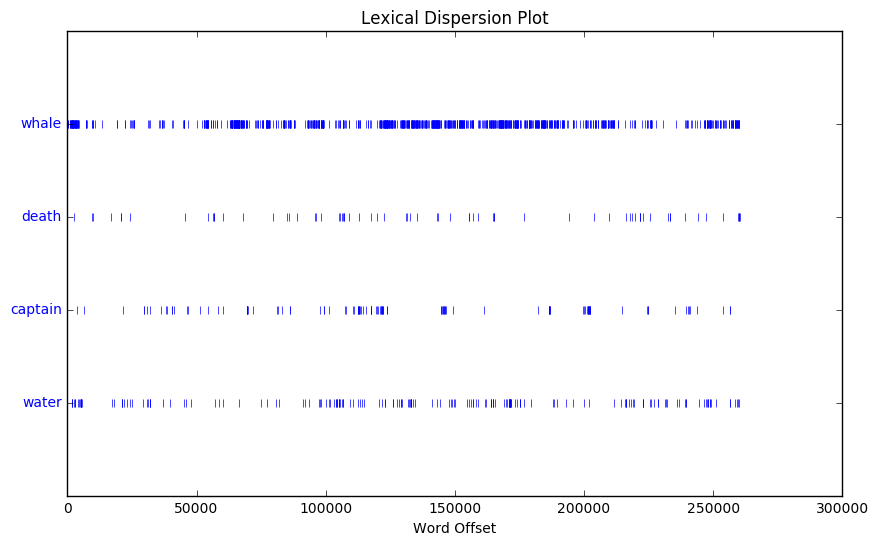

In [7]:
text1.dispersion_plot(['whale', 'death', 'captain', 'water'])

In [8]:
text1.generate(words=100) # not available any more :(

### Counting Vocabulary

In [9]:
len(text1)

260819

In [10]:
1.0 * len(text1) / len(set(text1))

13.502044830977896

In [11]:
text1.count('whale')

906

In [12]:
1.0 * text1.count('whale') / len(text1)

0.003473673313677301

## Computing with Language: Simple Statistics

### Frequency Distributions

In [13]:
fd = FreqDist(text1)
fd.keys()[:5]

[u'funereal', u'unscientific', u'divinely', u'foul', u'four']

In [14]:
fd['whale']

906

In [15]:
fd.hapaxes()[:5]

[u'funereal', u'unscientific', u'prefix', u'plaudits', u'woody']

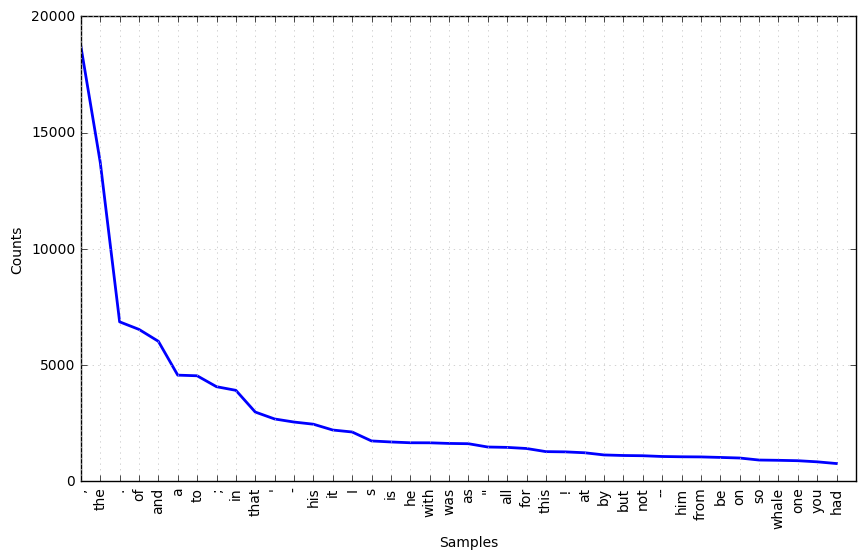

In [16]:
fd.plot(40)

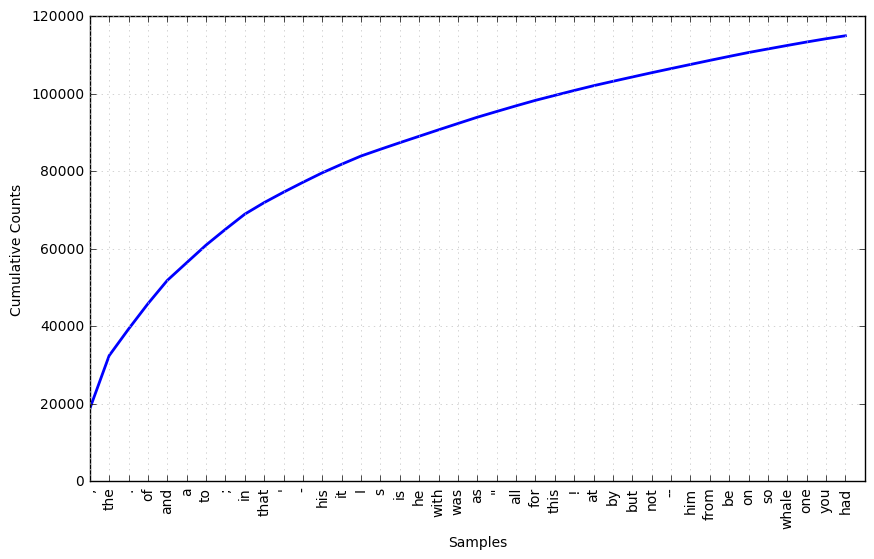

In [17]:
fd.plot(40, cumulative=True)

### Fine-Grained Selection of Words

In [18]:
[w for w in set(text1) if len(w) > 15][:5]

[u'hermaphroditical',
 u'subterraneousness',
 u'uninterpenetratingly',
 u'irresistibleness',
 u'responsibilities']

In [19]:
[w for w in set(text1) if len(w) > 10 and fd[w] > 10][:5]

[u'circumstances',
 u'Nevertheless',
 u'peculiarities',
 u'Nantucketer',
 u'considerable']

### Collocations and Bigrams

In [20]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


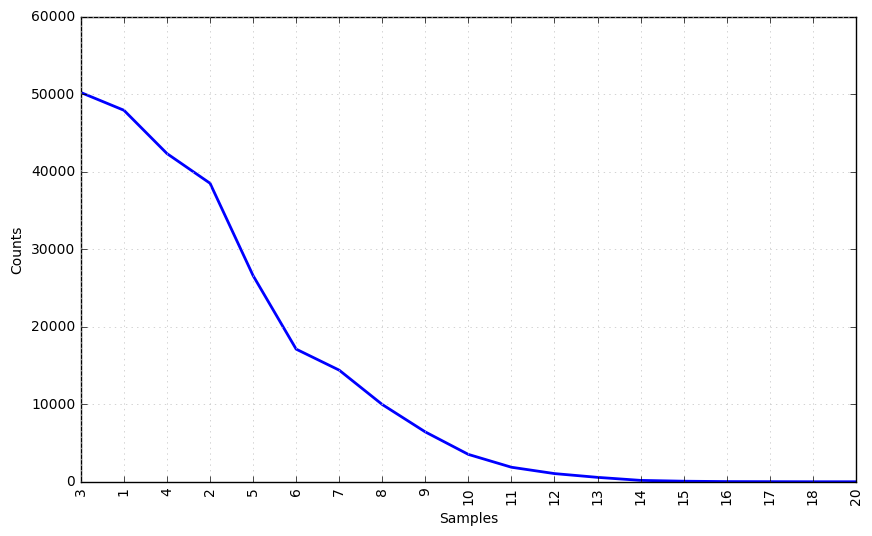

In [21]:
FreqDist([len(w) for w in text1]).plot()

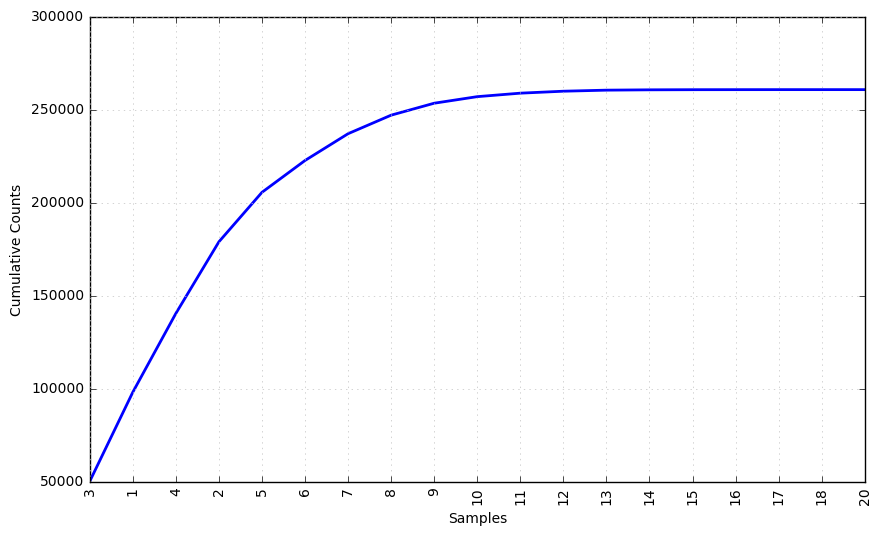

In [22]:
FreqDist([len(w) for w in text1]).plot(cumulative=True)